In [1]:
#Importing Neccessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading CSV File

lok=pd.read_csv("GE_2024_Results.csv")
lok

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost
...,...,...,...,...,...,...,...,...,...,...
8897,8898,West Bengal,Uluberia,SK. SAPIYAR ALI,Independent,2924,-,2924,0.21,Lost
8898,8899,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107,0.15,Lost
8899,8900,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000,0.14,Lost
8900,8901,West Bengal,Uluberia,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572,0.11,Lost


In [3]:
#Checking unique values

lok.nunique()

ID              8902
State             36
Constituency     541
Candidate       8101
Party            746
EVM Votes       6081
Postal Votes    1447
Total Votes     6100
% of Votes      1557
Result             2
dtype: int64

In [4]:
lok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            8902 non-null   int64 
 1   State         8902 non-null   object
 2   Constituency  8902 non-null   object
 3   Candidate     8902 non-null   object
 4   Party         8902 non-null   object
 5   EVM Votes     8902 non-null   object
 6   Postal Votes  8902 non-null   object
 7   Total Votes   8902 non-null   int64 
 8   % of Votes    8902 non-null   object
 9   Result        8902 non-null   object
dtypes: int64(2), object(8)
memory usage: 695.6+ KB


In [5]:
# Convert numeric columns to appropriate data types

lok['EVM Votes'] = pd.to_numeric(lok['EVM Votes'], errors='coerce')
lok['Postal Votes'] = pd.to_numeric(lok['Postal Votes'], errors='coerce')
lok['Total Votes'] = pd.to_numeric(lok['Total Votes'], errors='coerce')
lok['% of Votes'] = pd.to_numeric(lok['% of Votes'], errors='coerce')


lok.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            8902 non-null   int64  
 1   State         8902 non-null   object 
 2   Constituency  8902 non-null   object 
 3   Candidate     8902 non-null   object 
 4   Party         8902 non-null   object 
 5   EVM Votes     8901 non-null   float64
 6   Postal Votes  8324 non-null   float64
 7   Total Votes   8902 non-null   int64  
 8   % of Votes    8901 non-null   float64
 9   Result        8902 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 695.6+ KB


In [6]:
# Check Whether the dataset contains any missing or duplicate values
lok.isna().sum()



ID                0
State             0
Constituency      0
Candidate         0
Party             0
EVM Votes         1
Postal Votes    578
Total Votes       0
% of Votes        1
Result            0
dtype: int64

In [7]:
# Fill missing values for 'EVM Votes' and '% of Votes' with the mean of their respective columns
lok['EVM Votes'].fillna(lok['EVM Votes'].mean(), inplace=True)
lok['% of Votes'].fillna(lok['% of Votes'].mean(), inplace=True)


# Fill missing 'Postal Votes' with 0
lok['Postal Votes'].fillna(0, inplace=True)


In [8]:
#Checking where the missing values is eliminated or not

missing=lok.isna().sum()
missing

ID              0
State           0
Constituency    0
Candidate       0
Party           0
EVM Votes       0
Postal Votes    0
Total Votes     0
% of Votes      0
Result          0
dtype: int64

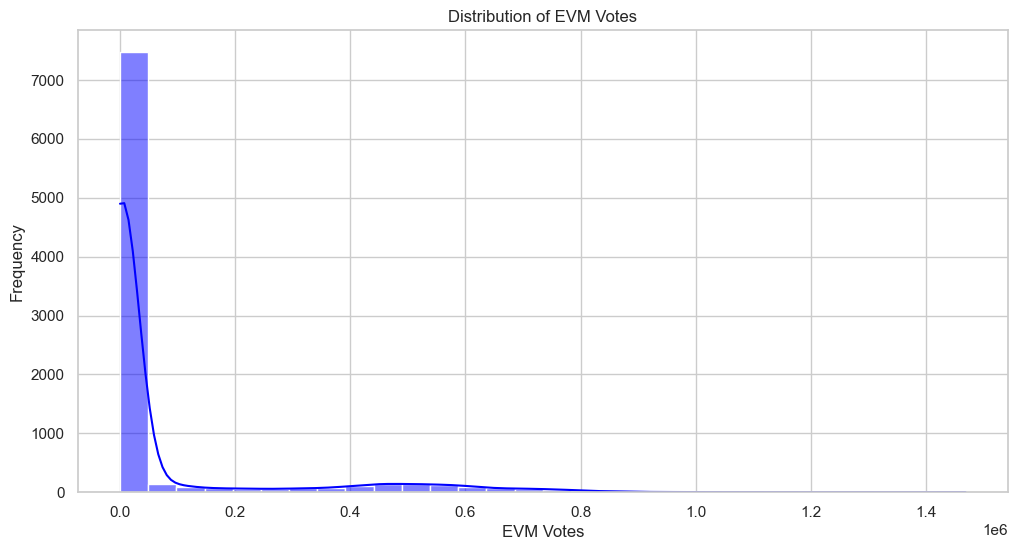

In [9]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of EVM votes
plt.figure(figsize=(12, 6))
sns.histplot(lok['EVM Votes'], bins=30, kde=True, color='blue')
plt.title('Distribution of EVM Votes')
plt.xlabel('EVM Votes')
plt.ylabel('Frequency')
plt.show()


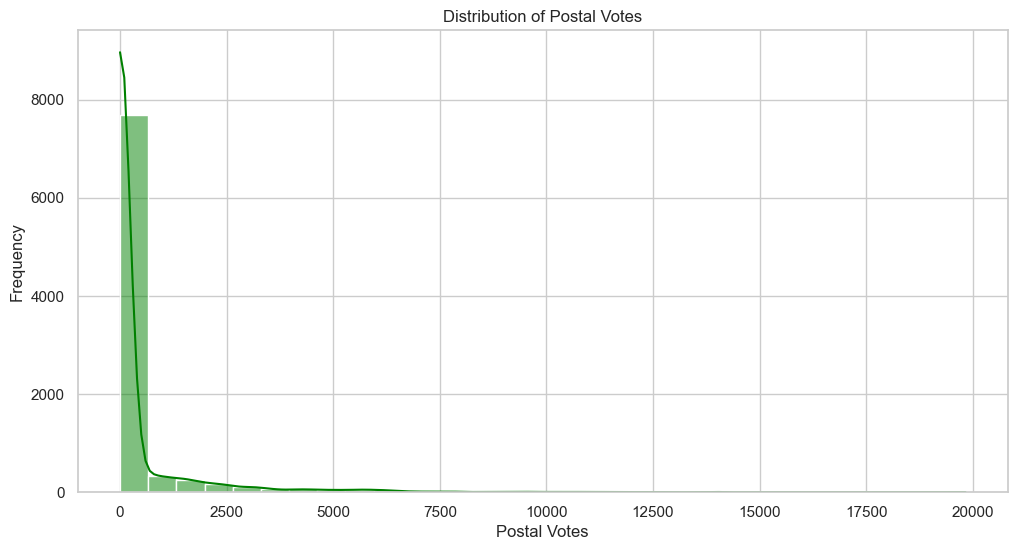

In [10]:
# Plot the distribution of postal votes
plt.figure(figsize=(12, 6))
sns.histplot(lok['Postal Votes'], bins=30, kde=True, color='green')
plt.title('Distribution of Postal Votes')
plt.xlabel('Postal Votes')
plt.ylabel('Frequency')
plt.show()

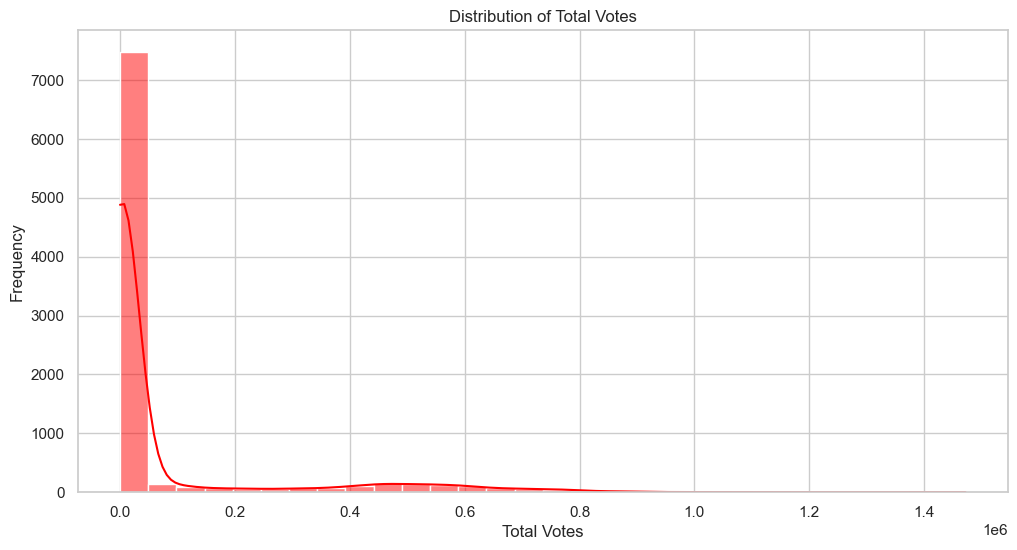

In [11]:
# Plot the distribution of total votes
plt.figure(figsize=(12, 6))
sns.histplot(lok['Total Votes'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.show()

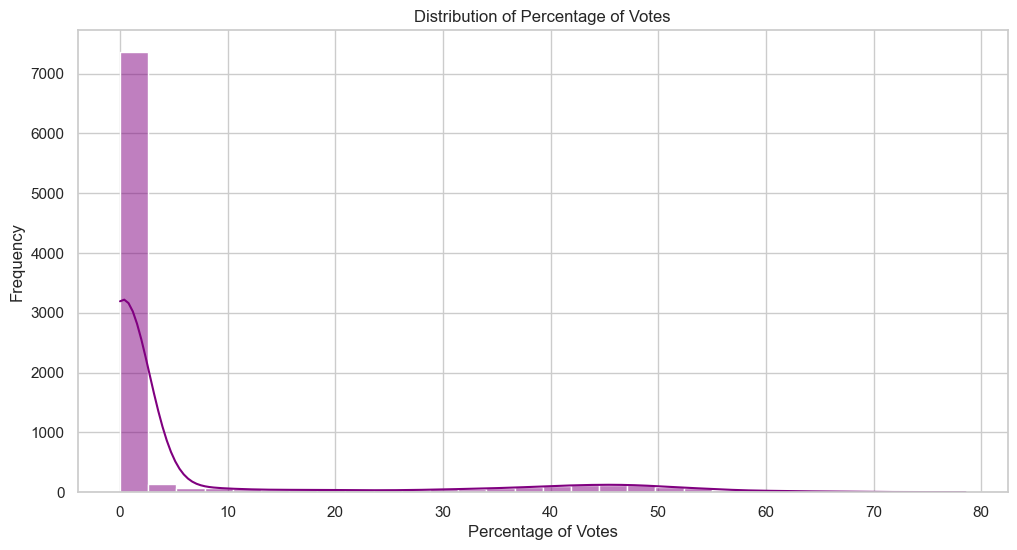

In [12]:
# Plot the distribution of percentage of votes
plt.figure(figsize=(12, 6))
sns.histplot(lok['% of Votes'], bins=30, kde=True, color='purple')
plt.title('Distribution of Percentage of Votes')
plt.xlabel('Percentage of Votes')
plt.ylabel('Frequency')
plt.show()

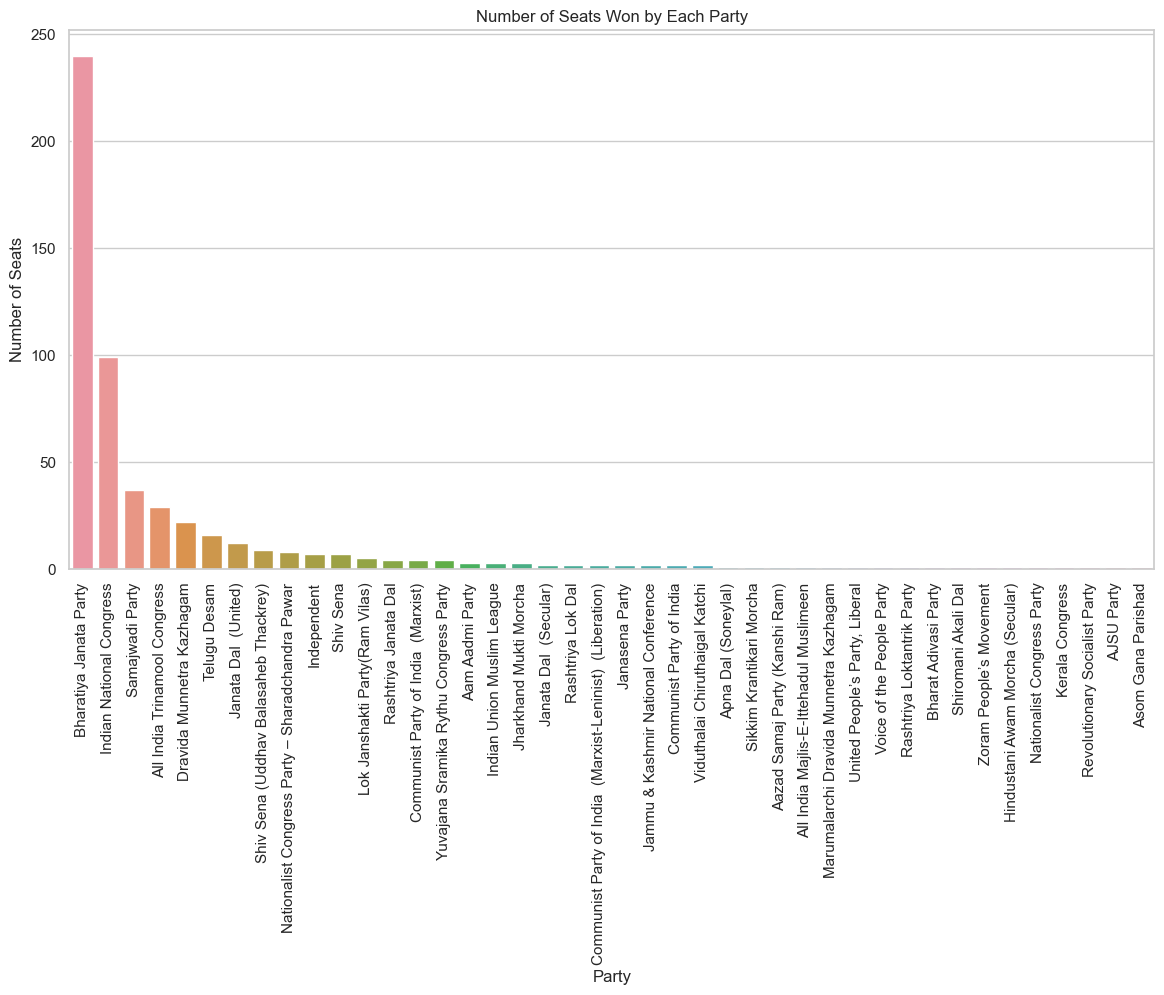

In [13]:
# Analyze the number of seats won by different parties
plt.figure(figsize=(14, 7))
sns.countplot(data=lok[lok['Result'] == 'Won'], x='Party', order=lok[lok['Result'] == 'Won']['Party'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.show()

Top candidates by winning margin:
               State       Constituency                        Candidate  \
3289  Madhya Pradesh             INDORE                  SHANKAR LALWANI   
1664         Gujarat            Navsari                        C R PATIL   
3522  Madhya Pradesh            VIDISHA            SHIVRAJ SINGH CHOUHAN   
1590         Gujarat        Gandhinagar                        AMIT SHAH   
7352         Tripura       Tripura West                 BIPLAB KUMAR DEB   
1753         Gujarat           Vadodara                 DR. HEMANG JOSHI   
3324  Madhya Pradesh          KHAJURAHO  VISHNU DATT SHARMA (V.D.SHARMA)   
8565     West Bengal    Diamond harbour                ABHISHEK BANERJEE   
4184     Maharashtra  Mumbai North West         RAVINDRA DATTARAM WAIKAR   
1679         Gujarat         Panchmahal    RAJPALSINH MAHENDRASINH JADAV   

                             Party  % of Votes  Winning Margin  
3289        Bharatiya Janata Party       78.54           64.54  

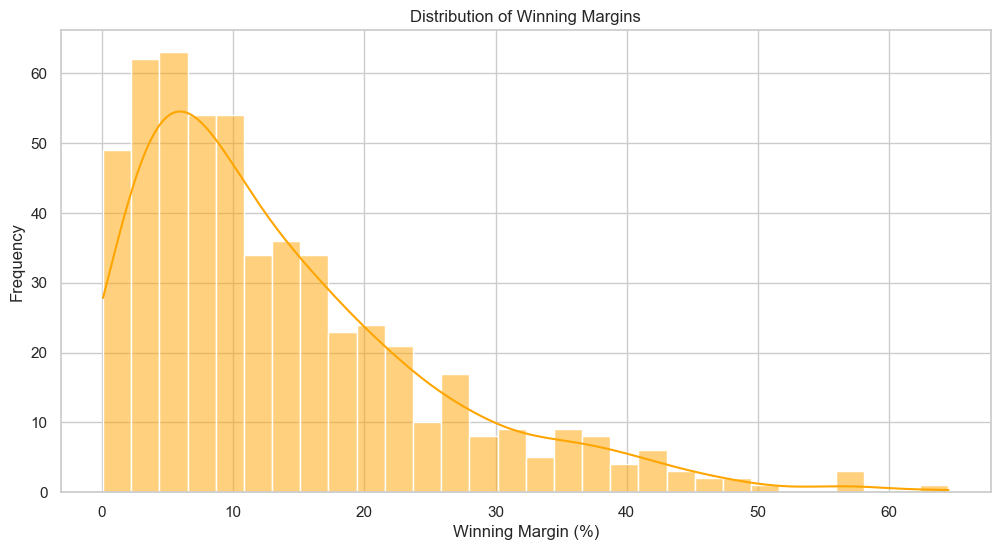

In [14]:
# Calculate the winning margin as a percentage difference from the closest competitor
def calculate_winning_margin(df):
    df_sorted = df.sort_values(by=['Constituency', '% of Votes'], ascending=False)
    df_sorted['Next Highest %'] = df_sorted.groupby('Constituency')['% of Votes'].shift(-1)
    df_sorted['Winning Margin'] = df_sorted['% of Votes'] - df_sorted['Next Highest %']
    return df_sorted

# Apply the function to calculate winning margin
lok_with_margin = calculate_winning_margin(lok)

# Filter to only include winners
winners = lok_with_margin[lok_with_margin['Result'] == 'Won']

# Display the top candidates by winning margin
print("Top candidates by winning margin:")
print(winners[['State', 'Constituency', 'Candidate', 'Party', '% of Votes', 'Winning Margin']].sort_values(by='Winning Margin', ascending=False).head(10))

# Plot the distribution of winning margins
plt.figure(figsize=(12, 6))
sns.histplot(winners['Winning Margin'], bins=30, kde=True, color='orange')
plt.title('Distribution of Winning Margins')
plt.xlabel('Winning Margin (%)')
plt.ylabel('Frequency')
plt.show()


Top parties by total votes:
                                     Party  Total Votes
158                 Bharatiya Janata Party    235973935
289               Indian National Congress    136759064
617                        Samajwadi Party     29549381
69            All India Trinamool Congress     28213393
282                            Independent     17844442
744  Yuvajana Sramika Rythu Congress Party     13316039
121                    Bahujan Samaj Party     13153818
698                           Telugu Desam     12775270
250              Dravida Munnetra Kazhagam     11754710
227    Communist Party of India  (Marxist)     11342553


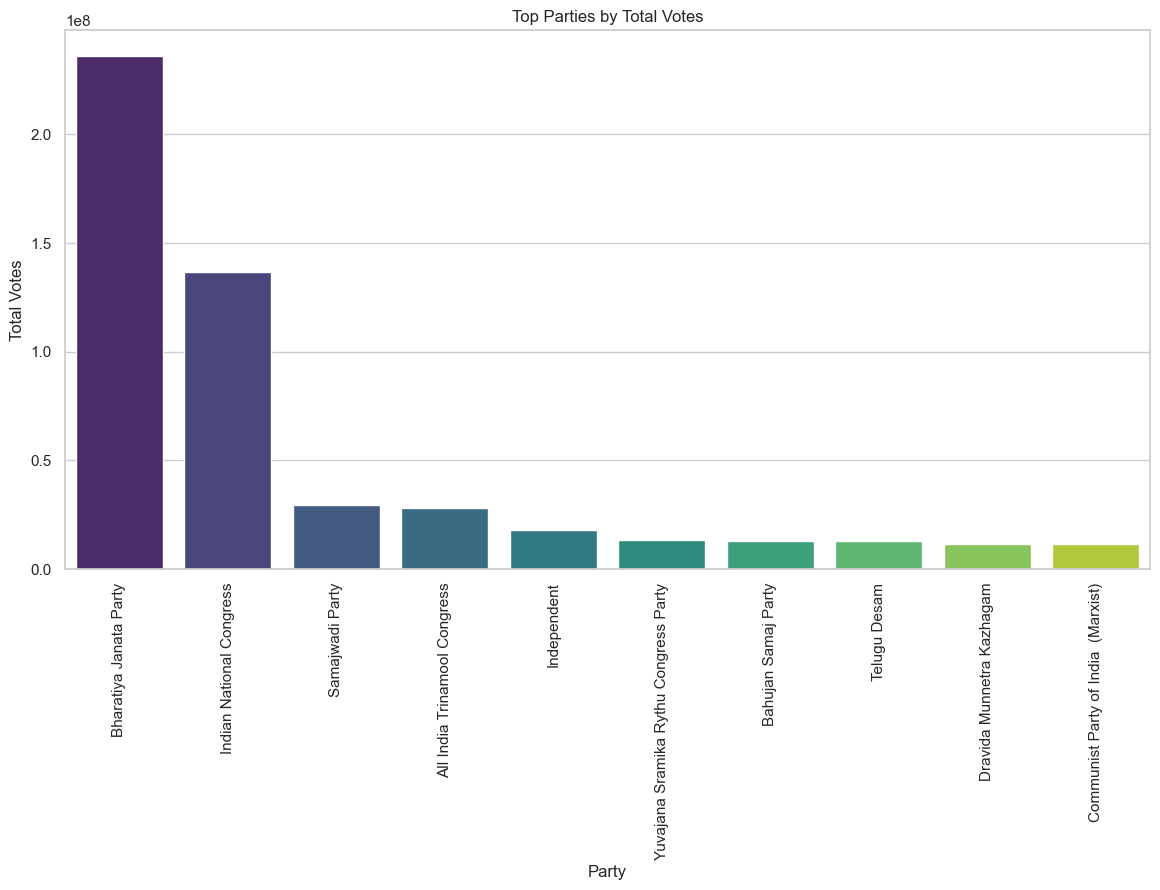

In [15]:
# Calculate total votes for each party
party_votes = lok.groupby('Party')['Total Votes'].sum().reset_index()

# Sort and display the top parties by total votes
top_parties = party_votes.sort_values(by='Total Votes', ascending=False)
print("Top parties by total votes:")
print(top_parties.head(10))

# Plot the top parties by total votes
plt.figure(figsize=(14, 7))
sns.barplot(data=top_parties.head(10), x='Party', y='Total Votes', palette='viridis')
plt.title('Top Parties by Total Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.show()


Top candidates by percentage of votes:
               State     Constituency                      Candidate  \
3289  Madhya Pradesh           INDORE                SHANKAR LALWANI   
1664         Gujarat          Navsari                      C R PATIL   
3522  Madhya Pradesh          VIDISHA          SHIVRAJ SINGH CHOUHAN   
1590         Gujarat      Gandhinagar                      AMIT SHAH   
7352         Tripura     Tripura West               BIPLAB KUMAR DEB   
1753         Gujarat         Vadodara               DR. HEMANG JOSHI   
1679         Gujarat       Panchmahal  RAJPALSINH MAHENDRASINH JADAV   
7342         Tripura     Tripura East           KRITI DEVI DEBBARMAN   
3441  Madhya Pradesh            SAGAR              DR. LATA WANKHEDE   
8565     West Bengal  Diamond harbour              ABHISHEK BANERJEE   

                             Party  % of Votes  
3289        Bharatiya Janata Party       78.54  
1664        Bharatiya Janata Party       77.05  
3522        Bharatiya

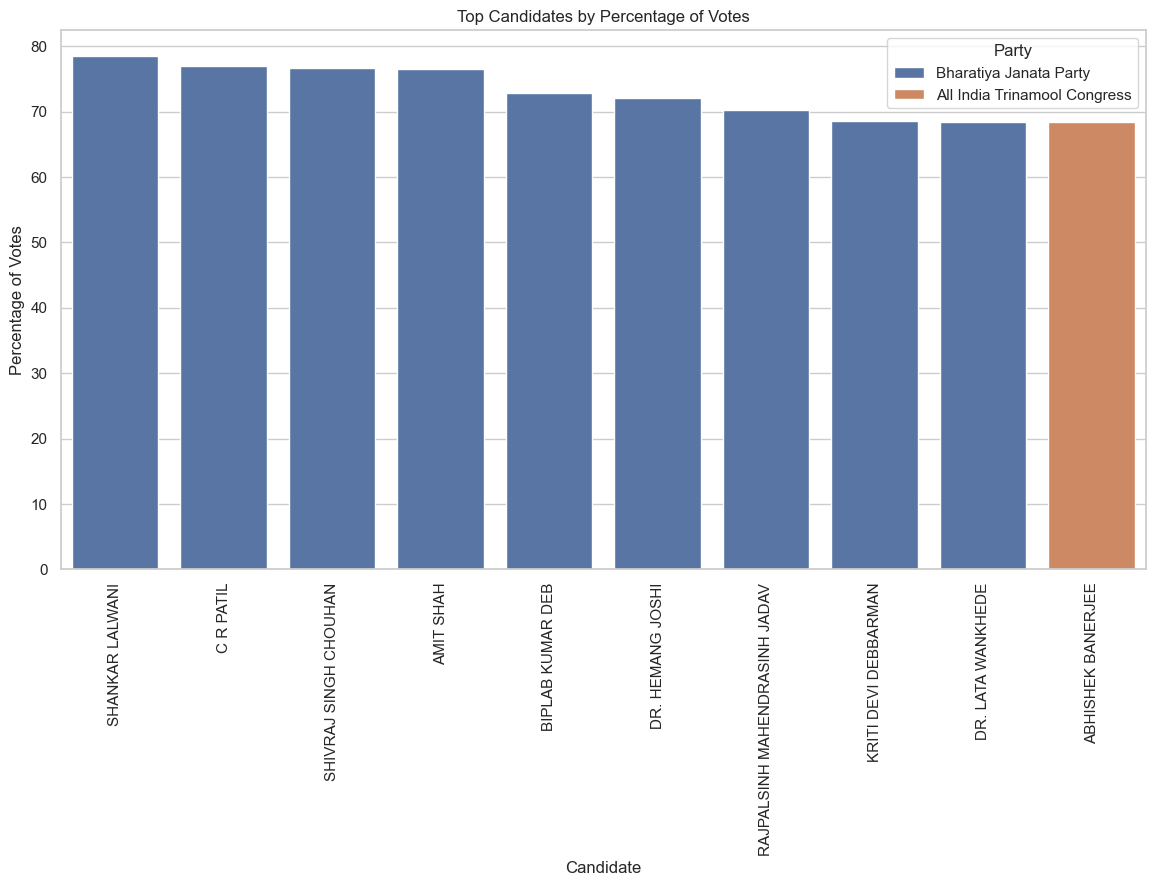

In [16]:
# Display the top candidates by percentage of votes
top_candidates = lok.sort_values(by='% of Votes', ascending=False)
print("Top candidates by percentage of votes:")
print(top_candidates[['State', 'Constituency', 'Candidate', 'Party', '% of Votes']].head(10))

# Plot the top candidates by percentage of votes
plt.figure(figsize=(14, 7))
sns.barplot(data=top_candidates.head(10), x='Candidate', y='% of Votes', hue='Party', dodge=False)
plt.title('Top Candidates by Percentage of Votes')
plt.xlabel('Candidate')
plt.ylabel('Percentage of Votes')
plt.xticks(rotation=90)
plt.show()


Number of seats won by each party in each state:
Party                                 AJSU Party  Aam Aadmi Party  \
State                                                               
Andaman & Nicobar Islands                      0                0   
Andhra Pradesh                                 0                0   
Arunachal Pradesh                              0                0   
Assam                                          0                0   
Bihar                                          0                0   
Chandigarh                                     0                0   
Chhattisgarh                                   0                0   
Dadra & Nagar Haveli and Daman & Diu           0                0   
Goa                                            0                0   
Gujarat                                        0                0   

Party                                 Aazad Samaj Party (Kanshi Ram)  \
State                                             

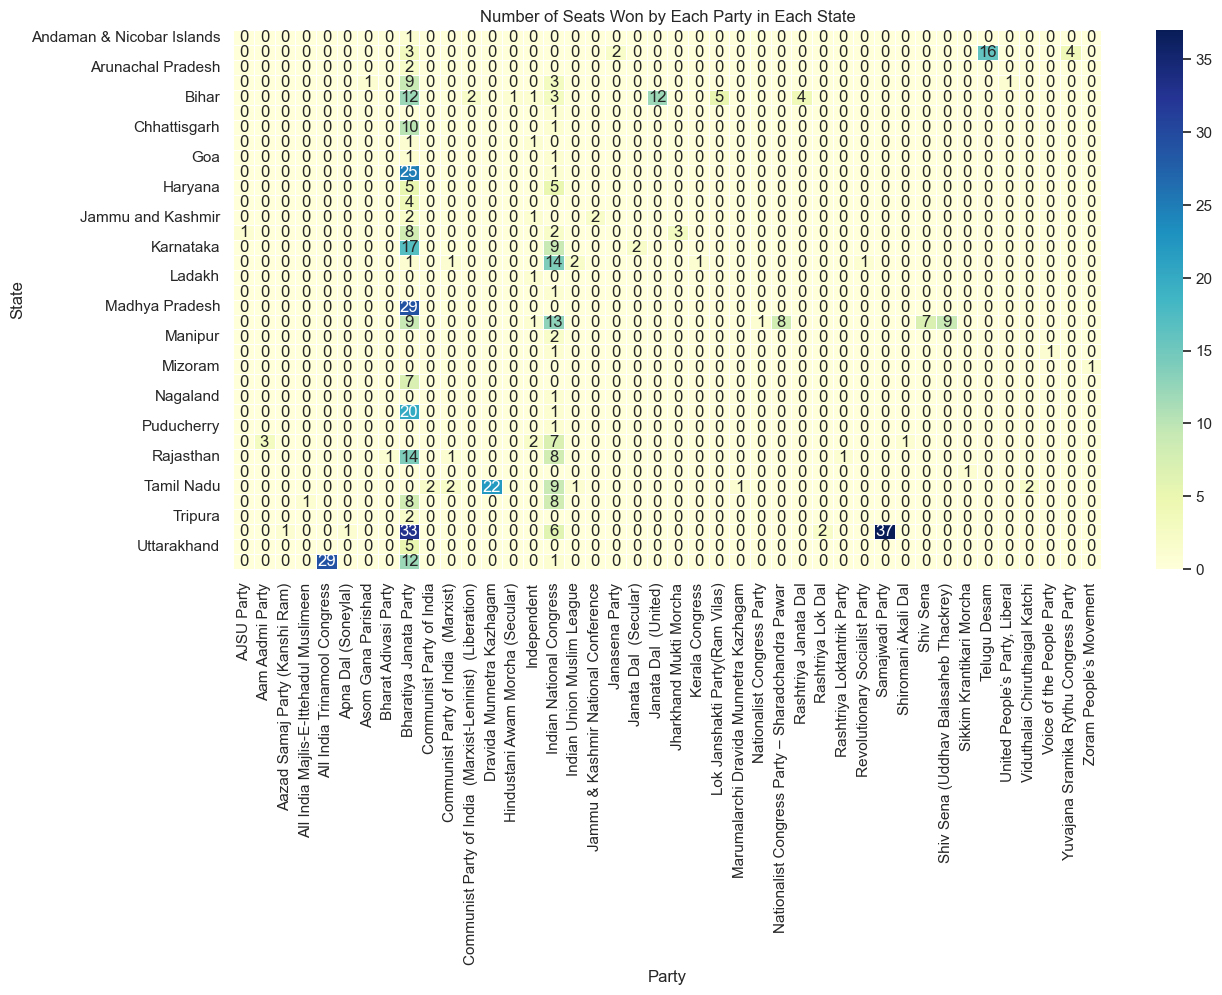

In [17]:
#State Wise Analysis

# Calculate the number of seats won by each party in each state
state_party_wins = lok[lok['Result'] == 'Won'].groupby(['State', 'Party']).size().unstack(fill_value=0)

# Display the top states by number of seats won for each party
print("Number of seats won by each party in each state:")
print(state_party_wins.head(10))

# Plot the number of seats won by each party in each state
plt.figure(figsize=(14, 7))
sns.heatmap(state_party_wins, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Number of Seats Won by Each Party in Each State')
plt.xlabel('Party')
plt.ylabel('State')
plt.show()